#Construct your own convolutional neural network, train the network with CIFAR10 dataset, then test the classification result of the implementation of horizontal and vertical flip augmentation technique on “dog.jpg” image.

Epoch 1/50
782/782 [==============================] - 8s 8ms/step - loss: 1.2446 - accuracy: 0.5618 - val_loss: 1.2769 - val_accuracy: 0.5530
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 0.9135 - accuracy: 0.6821 - val_loss: 1.2076 - val_accuracy: 0.5925
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 0.7826 - accuracy: 0.7284 - val_loss: 1.0297 - val_accuracy: 0.6532
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 0.6760 - accuracy: 0.7641 - val_loss: 1.3103 - val_accuracy: 0.5871
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.5973 - accuracy: 0.7935 - val_loss: 1.0812 - val_accuracy: 0.6538
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 0.5178 - accuracy: 0.8184 - val_loss: 0.9133 - val_accuracy: 0.7066
Epoch 7/50
782/782 [==============================] - 6s 7ms/step - loss: 0.4533 - accuracy: 0.8429 - val_loss: 1.1010 - val_accuracy: 0.6662
Epoch 

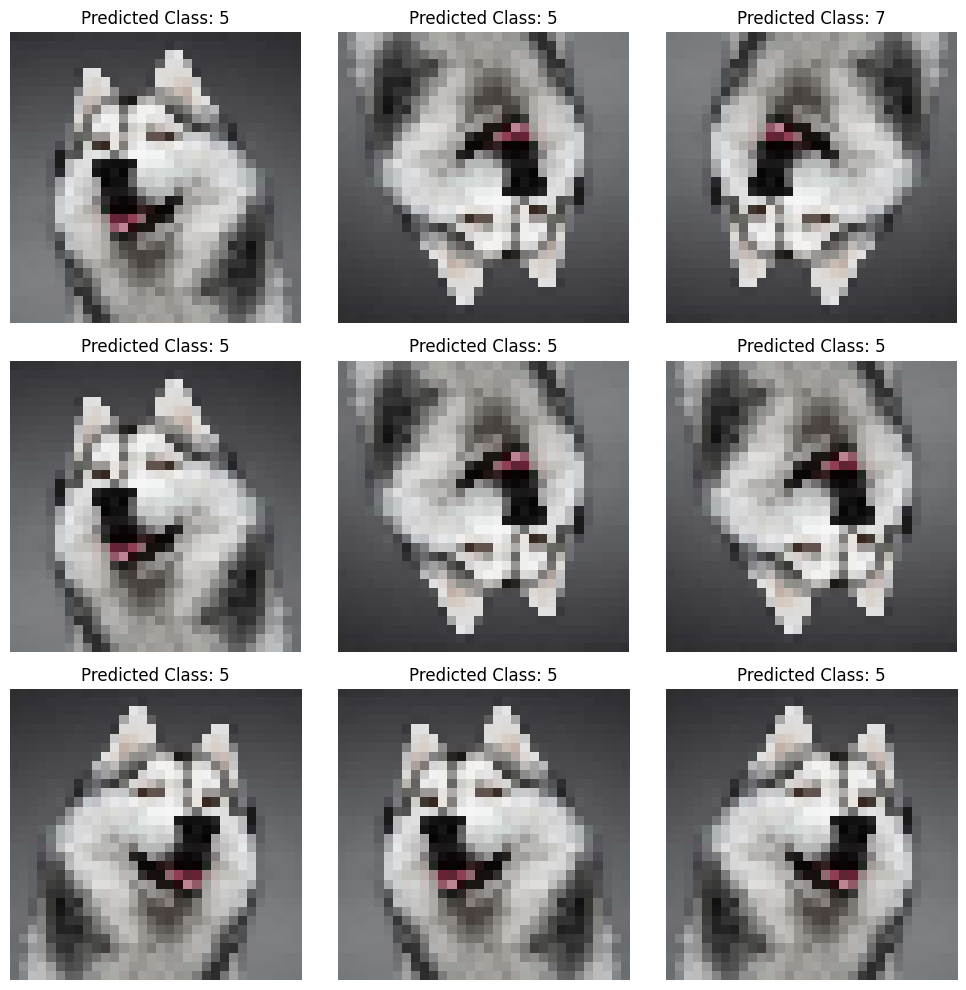

In [4]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# Step 1: Download and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Step 2: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the CNN model
model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(test_images, test_labels))

# Step 4: Image Augmentation
img = load_img('dog.jpg', target_size=(32, 32))
img_array = img_to_array(img)
# img_array = img_array.reshape((1,) + img_array.shape)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Initialize ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# Create augmented images (flipped horizontally and vertically)
augmented_images = datagen.flow(img_array)

# Display the flipped images and classification results
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        # Get the flipped image
        augmented_image = augmented_images.next()

        # Predict the class using the CNN model
        prediction = model.predict(augmented_image)

        # Display the flipped image
        axs[i, j].imshow(np.squeeze(augmented_image))
        axs[i, j].axis('off')
        axs[i, j].set_title(f'Predicted Class: {np.argmax(prediction)}')

plt.tight_layout()
plt.show()

#Construct your own convolutional neural network, train the network with MNIST dataset, then test the classification result of the implementation of rotation augmentation technique on “handwritten6.jpg” image.

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/50
938/938 [==============================] - 18s 7ms/step - loss: 0.1053 - accuracy: 0.9704 - val_loss: 0.0452 - val_accuracy: 0.9856
Epoch 2/50
938/938 [==============================] - 7s 8ms/step - loss: 0.0378 - accuracy: 0.9888 - val_loss: 0.0573 - val_accuracy: 0.9808
Epoch 3/50
938/938 [==============================] - 6s 6ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.0708 - val_accuracy: 0.9772
Epoch 4/50
938/938 [==============================] - 7s 7ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0413 - val_accuracy: 0.9867
Epoch 5/50
938/938 [==============================] - 6s 7ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 6/50
938/938 [==============================] - 7s 7ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0504 - val_accuracy: 0.9841
Epoch 7/50
938/938 [==============================] - 6s 7ms/step - loss: 0.0097 -

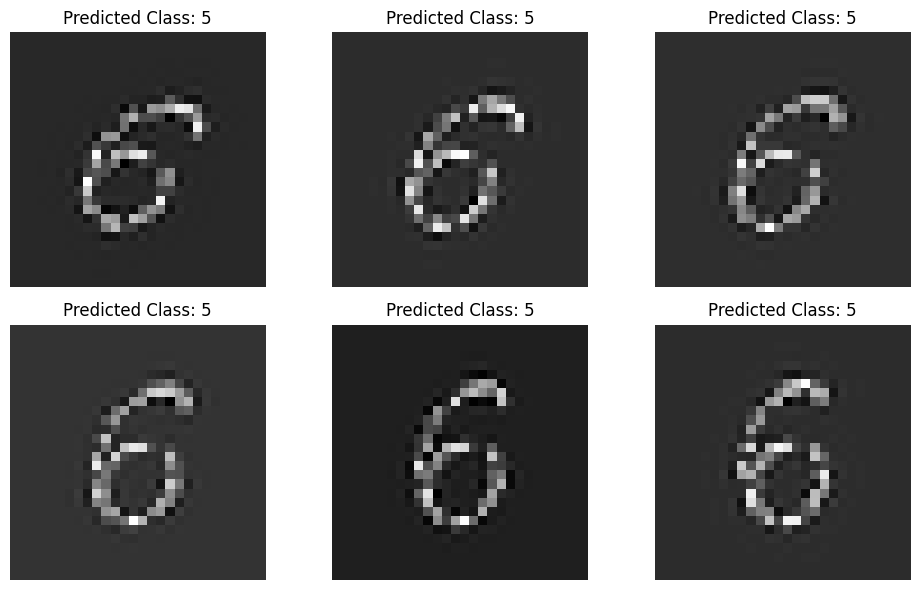

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from scipy.ndimage import rotate

# Step 1: Download and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Step 2: Build the CNN model with Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train the CNN model
model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(test_images, test_labels))

# Step 4: Implement rotation augmentation on "handwritten6.jpg" image
img = load_img('handwritten6.jpg', color_mode='grayscale', target_size=(28, 28))
img_array = img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape) / 255.0

rotated_images = []
rotation_angles = [-15, -10, -5, 5, 10, 15]  # Rotation angles for augmentation

for angle in rotation_angles:
    rotated_img = rotate(img_array[0], angle, reshape=False)
    rotated_images.append(rotated_img)

rotated_images = np.array(rotated_images).reshape(-1, 28, 28, 1)

# Step 5: Test the CNN model with augmented images
predictions = model.predict(rotated_images)
predicted_classes = np.argmax(predictions, axis=1)

# Step 6: Display augmented images and classification result
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

for i, ax in enumerate(axs.flat):
    ax.imshow(rotated_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Predicted Class: {predicted_classes[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
